# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fath' Hani Sarli Bajsair
- **Email:** hanisarly@gmail.com
- **ID Dicoding:** sarlybajsair

## Menentukan Pertanyaan Bisnis

- pada musim apakah penyewaan sepeda paling banyak terjadi?
- Pada jam berapa kah penyewaan paling banyak dan paling sedikit dilakukan?
- Bagaimana jumlah total pelanggan setiap hari kerja dan hari libur?
- siapakah yang lebih sering melakukan penyewaan, pelanggan casual atau registered


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [22]:
# load day table
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
# load hour table
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#####Day Data

In [24]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [26]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [28]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Hour Data

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Hasil Assessing Data:
- tidak terdapat missing value
- tipe data dteday harus diganti menjadi datetime
- tipe data kolom season, mnth, holiday, weekday, dan weathersit harus diganti menjadi category, karena memiliki beberapa varian
- mengonversi isi kolom agar mudah dipahami (bukan dengan kode)
- mengganti nama kolom agar mudah dipahami saat dibaca

In [38]:
# convert object to datetime type
columns = ['dteday']

for column in columns:
  day_df[column] = pd.to_datetime(day_df['dteday'])
  hour_df[column] = pd.to_datetime(hour_df['dteday'])

In [39]:
# Define the list of columns to be converted to category type
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

# Convert the columns in day_df to category type
for column in columns:
    day_df[column] = day_df[column].astype('category')

# Convert the columns in hour_df to category type
for column in columns:
    hour_df[column] = hour_df[column].astype('category')

In [64]:
# mengganti nama kolom agar lebih mudah dipahami
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [66]:
# Mengkonversi isi kolom agar lebih mudah dipahami
# konversi season
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_situation
day_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
hour_df.weather_situation.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week
day_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
hour_df.one_of_week.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# konversi year
day_df.year.replace((0,1), ('2011','2012'), inplace=True)
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [67]:
day_df.head()

,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Misty,0.344167,0.363625,80.5833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Misty,0.363478,0.353739,69.6087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tuesday,1,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wednesday,1,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600


In [68]:
day_df.describe(include="all")

<ipython-input-68-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,year,month,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
count,731.000000,731,731,731,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,0.465233,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000


In [87]:
# melihat jumlah penyewaan terbanyak tiap musim
day_df.groupby(by="season").count_cr.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: count_cr, dtype: int64

musim fall memiliki jumlah penyewa terbanyak

In [90]:
#jumlah pelanggan setiap hari kerja dan hari libur
day_df.groupby('workingday')['count_cr',].sum()

,count_cr
workingday,
0,1000269
1,2292410


Penyewaan sepeda oleh lebih banyak di hari kerja

In [84]:
# melihat yang lebih sering melakukan penyewaan, antara pelanggan casual dan registered, per tahunnya
day_df.groupby('year')['casual', 'registered'].sum()

<ipython-input-84-c90da66cb7c8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_df.groupby('year')['casual', 'registered'].sum()


,casual,registered
year,,
2011,247252,995851
2012,372765,1676811


perusahaan memiliki jumlah pelanggan registered(member) lebih banyak dari pelanggan casual. Dan meningkat pesat di tahun berikutnya

### Explore Data hour_df

In [75]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0,0,1,1


In [79]:
hour_df.groupby('hours')['count_cr'].sum().sort_values(ascending=False)

hours
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: count_cr, dtype: int64

Penyewaan paling banyak terjadi pada jam 17.00 dan paling sedikit pada jam 04.00

## Visualization & Explanatory Analysis

- pada musim apakah penyewaan sepeda paling banyak terjadi?
- Pada jam berapa kah penyewaan paling banyak dan paling sedikit dilakukan?
- Manakah yang memiliki lebih banyak pelanggan, hari kerja atau hari libur?


### Pertanyaan 1: Pada musim apakah penyewaan sepeda paling banyak terjadi?

<ipython-input-181-8fb70d0726c2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


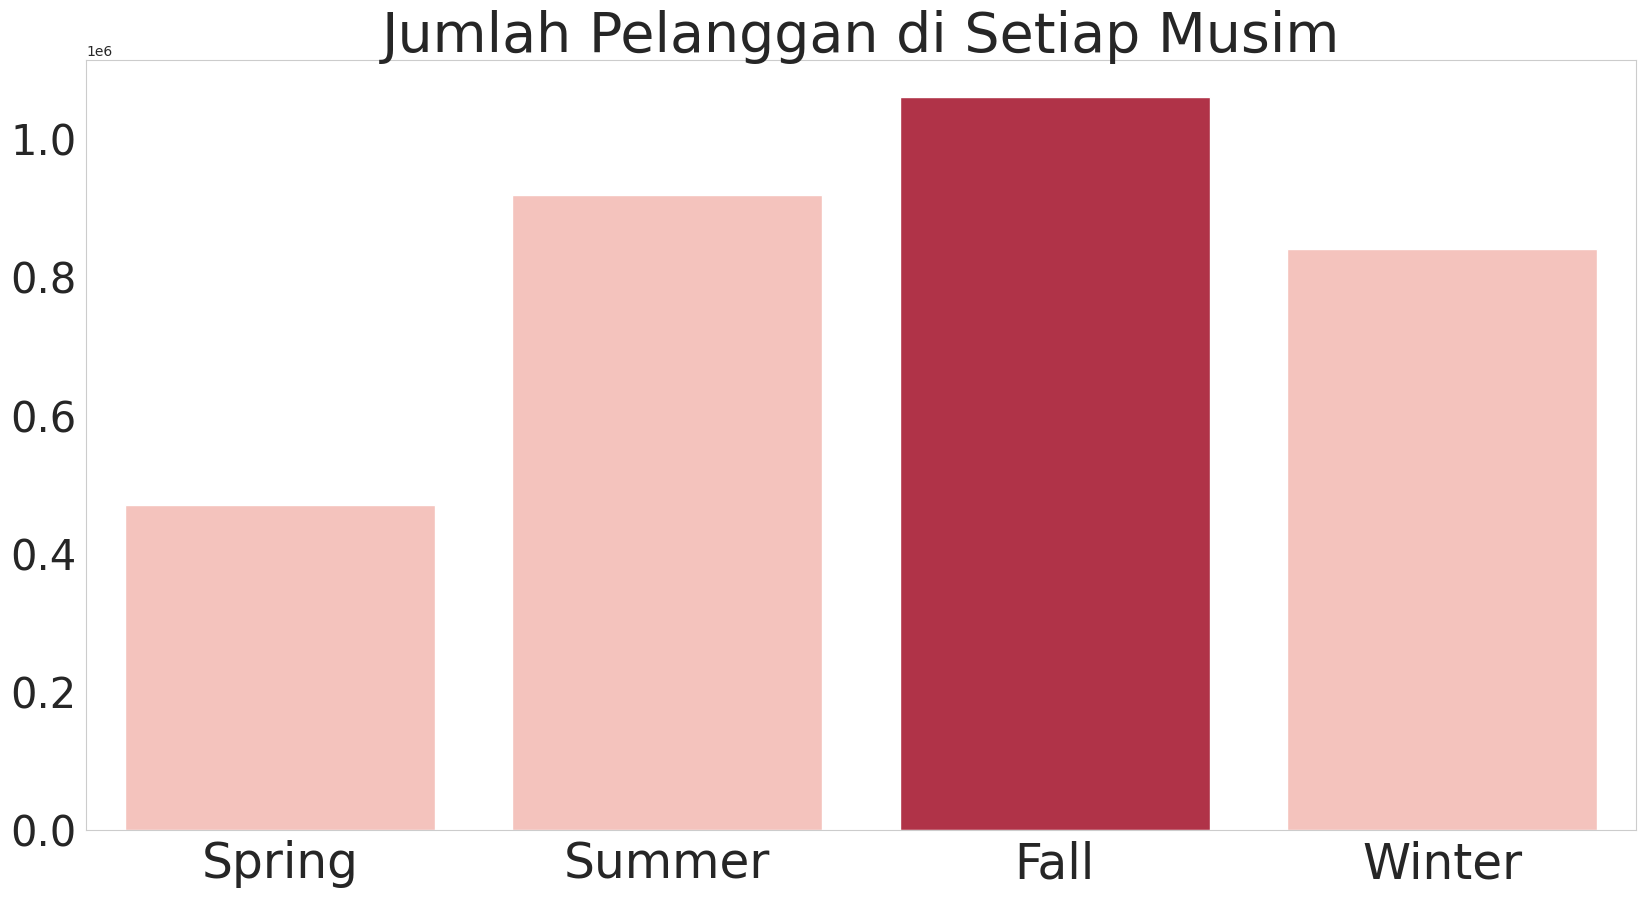

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#FDBCB4", "#FDBCB4", "#C51E3A", "#FDBCB4"]

fig, ax = plt.subplots(figsize=(20, 10))

# Group data by season and calculate sum of count_cr
season_grouped = day_df.groupby(by="season")['count_cr'].sum().sort_values(ascending=False)

# Create a bar chart using seaborn
sns.barplot(
        y=season_grouped.values,
        x=season_grouped.index,
        palette=colors,
        ax=ax
    )
# Set chart title and labels
plt.title("Jumlah Pelanggan di Setiap Musim", loc='center', fontsize=40)
plt.xlabel(None)
plt.ylabel(None)
ax.tick_params(axis='x', labelsize=35,)
ax.tick_params(axis='y', labelsize=30,)

ax.grid(False, axis='both')

# Show the chart
plt.show()

### Pertanyaan 2: Pada jam berapa kah penyewaan paling banyak dan paling sedikit dilakukan?

<ipython-input-250-371d6f2d2b6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-250-371d6f2d2b6a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


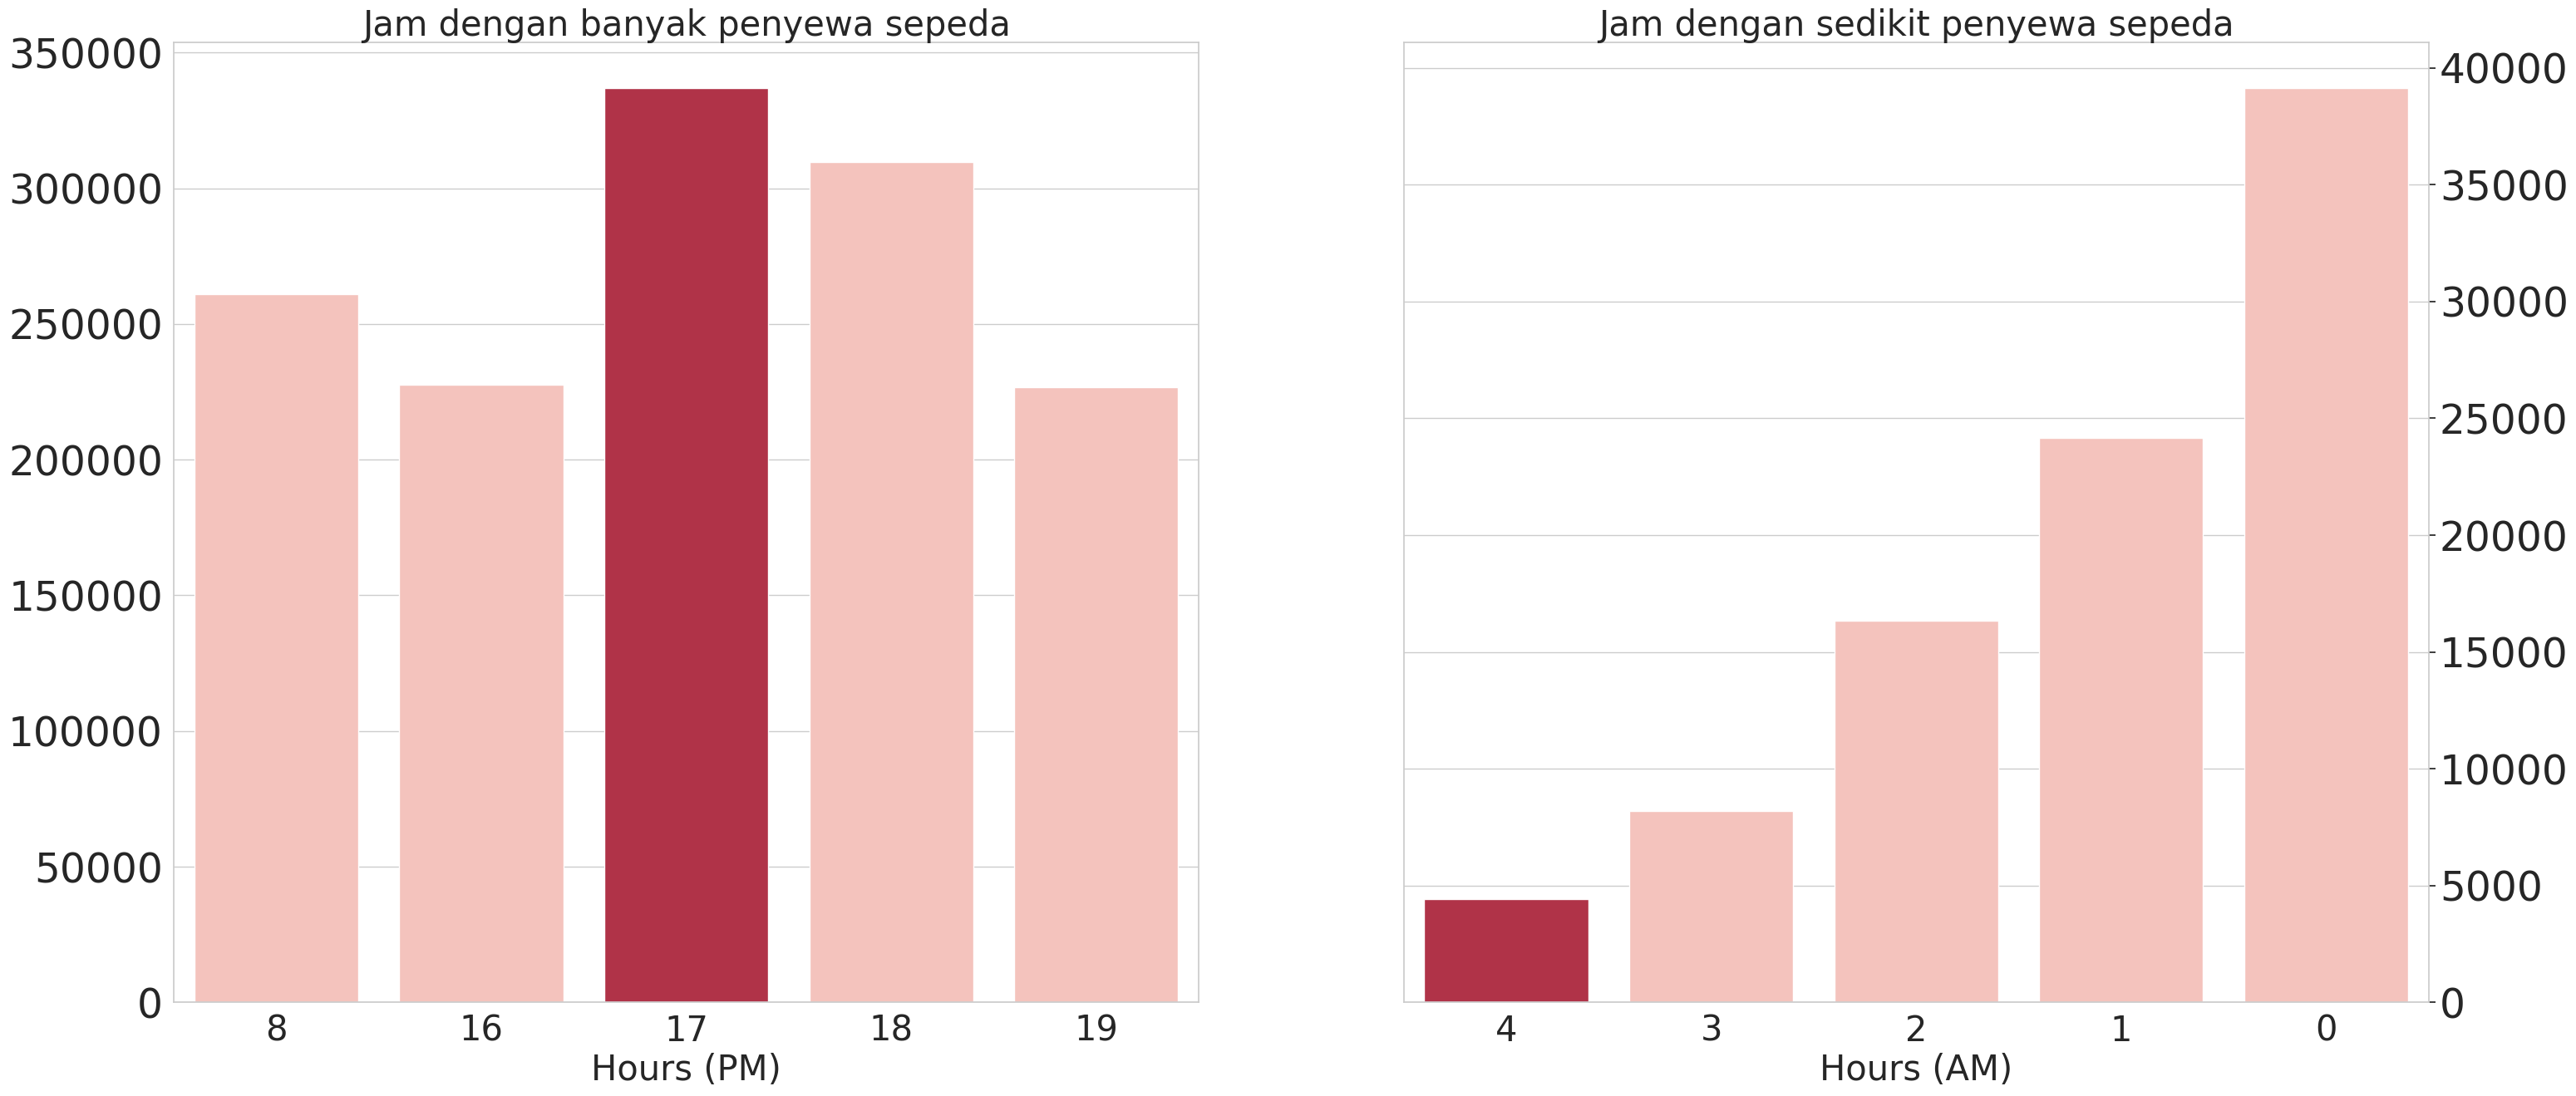

In [250]:
# Group data by hour and calculate sum of count_cr
hour_grouped = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

# membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

# membuat barplot untuk penyewa sepeda terbanyak
sns.barplot(
    x="hours",
    y="count_cr",
    data=hour_grouped.head(5),
    palette=["#FDBCB4", "#FDBCB4", "#C51E3A", "#FDBCB4", "#FDBCB4"],
    ax=ax[0])

# mengatur label dan judul untuk subplot pertama
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

# membuat barplot untuk penyewa sepeda terdikit
sns.barplot(
    x="hours",
    y="count_cr",
    data=hour_grouped.sort_values(by="hours", ascending=True).head(5),
    palette=["#FDBCB4", "#FDBCB4", "#FDBCB4", "#FDBCB4","#C51E3A"],
    ax=ax[1])

# mengatur label dan judul untuk subplot pertama
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# menampilkan plot
plt.show()

### Pertanyaan 3: Manakah yang memiliki lebih banyak pelanggan, hari kerja atau hari libur?

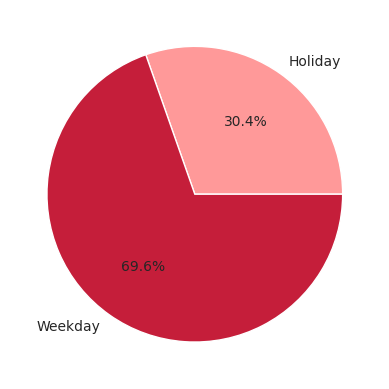

In [231]:
# Grouping data
working_grouped = day_df.groupby('workingday')['count_cr'].sum().reset_index()

# Ubah nama label
working_grouped['workingday'] = working_grouped['workingday'].replace({1: 'Weekday', 0: 'Holiday'})
total = working_grouped['count_cr'].sum()
explode = (0, 0)  # Menambahkan efek 'explode' untuk menonjolkan bagian dari pie chart

# Mengganti warna antar bagian
colors = ['#ff9999', '#C51E3A']

# Membuat pie chart
plt.pie(
    x=working_grouped['count_cr'].tolist(),
    labels=working_grouped['workingday'],  # Menggunakan kolom 'workingday' sebagai label
    autopct='%1.1f%%',  # Menampilkan persentase
    explode=explode,
    colors=colors,
)
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Penyewaan sepeda paling banyak dilakukan pada musim gugur (Fall)

- Conclution pertanyaan 2 : Penyewaan sepeda terjadi paling banyak pada pukul 17.00 dan paling sedikit pada pukul 04.00

- Conclution pertanyaan 3 : Weekday adalah hari yang lebih diminati untuk menyewa sepeda, berdasarkan pie chart tersebut

# Teknik Analisis Lanjutan

###RFM Analysis

In [259]:
# Grouping data untuk pelanggan casual
rfm_casual_df = day_df.groupby('casual').agg({
    'dteday': 'max', # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_casual_df.columns = ['casual', 'max_order_timestamp', 'Frequency', 'Monetary']

# Menghitung kapan terakhir pelanggan melakukan order (hari)
rfm_casual_df["max_order_timestamp"] = rfm_casual_df["max_order_timestamp"].dt.date
recent_date = rfm_casual_df["max_order_timestamp"].max()  # Menggunakan nama kolom yang sudah diubah
rfm_casual_df["Recency"] = rfm_casual_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

print(rfm_casual_df.head())


   casual max_order_timestamp  Frequency  Monetary  Recency
0       2          2012-10-29          1        22       63
1       9          2012-12-26          2      1124        5
2      15          2011-01-27          1       431      704
3      25          2011-01-12          1      1162      719
4      34          2011-01-26          1       506      705


<ipython-input-268-94ad9a5e3e30>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="casual", data=rfm_casual_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-268-94ad9a5e3e30>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="casual", data=rfm_casual_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-268-94ad9a5e3e30>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Monetary", x="casual", data=rfm_casual_df.sort_va

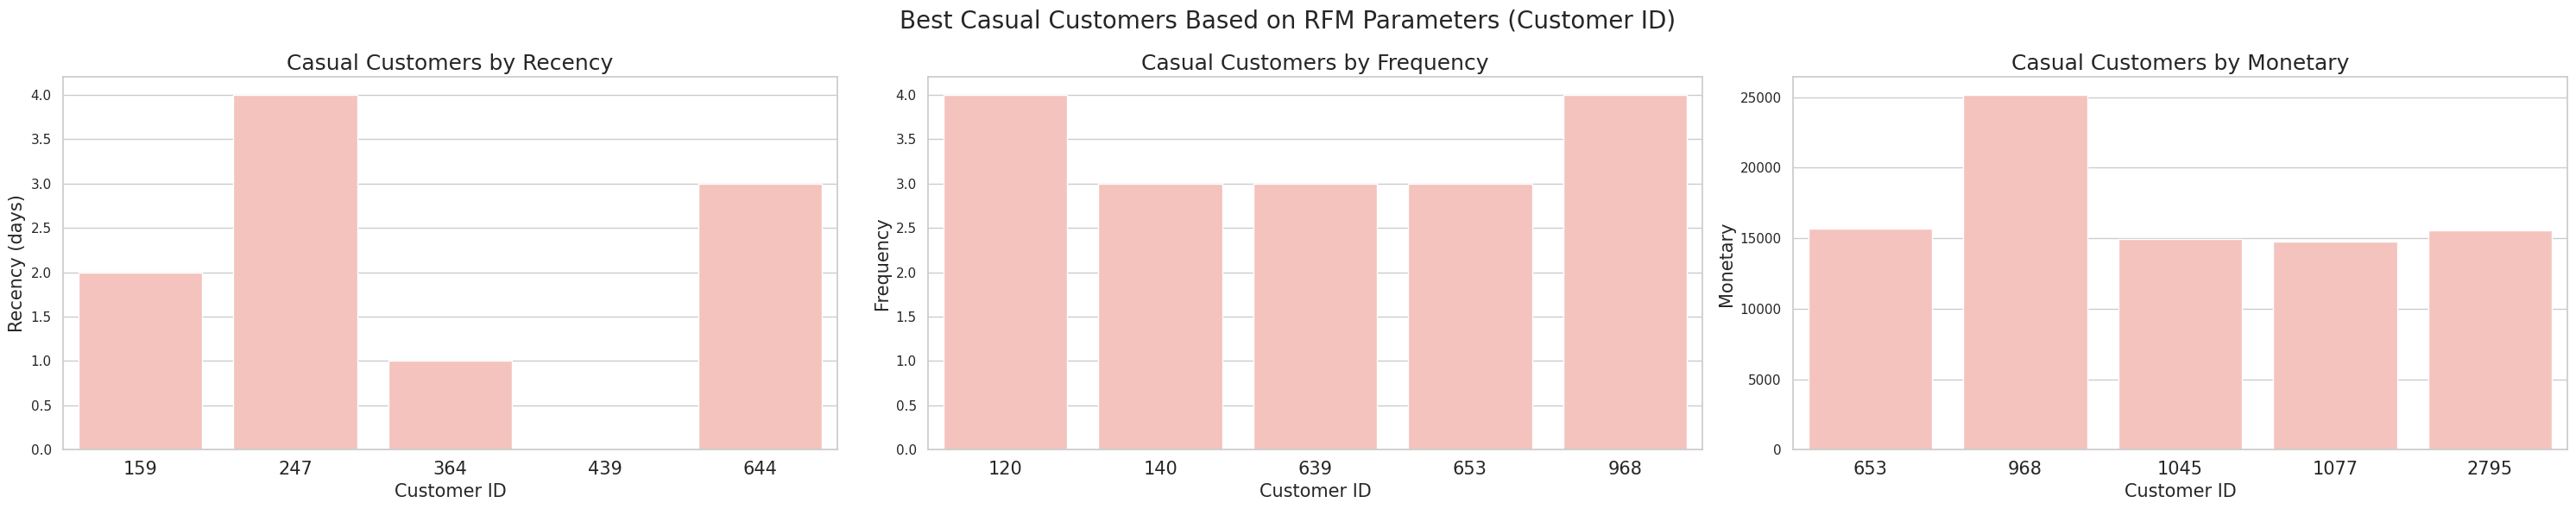

In [268]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna untuk bar plot
colors = ["#FDBCB4", "#FDBCB4", "#FDBCB4", "#FDBCB4", "#FDBCB4"]

# Visualisasi berdasarkan Recency
sns.barplot(y="Recency", x="casual", data=rfm_casual_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Recency (days)", fontsize=15)
ax[0].set_xlabel("Customer ID", fontsize=15)
ax[0].set_title("Casual Customers by Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Visualisasi berdasarkan Frequency
sns.barplot(y="Frequency", x="casual", data=rfm_casual_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Frequency", fontsize=15)
ax[1].set_xlabel("Customer ID", fontsize=15)
ax[1].set_title("Casual Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Visualisasi berdasarkan Monetary
sns.barplot(y="Monetary", x="casual", data=rfm_casual_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel("Monetary", fontsize=15)
ax[2].set_xlabel("Customer ID", fontsize=15)
ax[2].set_title("Casual Customers by Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Casual Customers Based on RFM Parameters (Customer ID)", fontsize=20)
plt.tight_layout()
plt.show()


Berdasarkan hasil analisis RFM untuk pelanggan casual:

- Recency : Waktu terakhir pelanggan melakukan penyewaan sepeda bervariasi salah satunya yaitu 5 hari yang lalu

- Frequency : Jumlah penyewaan sepeda oleh pelanggan casual berkisar dari 1 hingga 2 kali. Sebagian besar pelanggan hanya melakukan penyewaan sepeda beberapa kali.

- Monetary : Total nilai transaksi penyewaan sepeda oleh pelanggan casual bervariasi dari 22 hingga 1162 unit mata uang. Sebagian besar pelanggan memiliki nilai transaksi penyewaan sepeda yang rendah hingga menengah.

In [266]:
day_df.to_csv("day_fix.csv", index=False)

In [267]:
hour_df.to_csv("hour_fix.csv", index=False)